In [16]:
# Импортируем библиотеки
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from funcs import *

In [17]:
# Загружаем БД
df = pd.read_excel('connected.xlsx')
df.head()

,Nanoparticle,Electronegativity,Diameter (nm),Zeta_in_Water (mV),Concentration (ug/mL),Molecular weight (g/mol),Density (g/cm3),Viability (%),is_inorganic,Cell_Source,...,Cell_Type,Cell_Morphology,Test_Indicator,Time (hr),Test,Cell line (L)/primary cells (P),Zeta_in_Medium (mV),Cell_Tissue,Size_in_Medium (nm),Size_in_Water (nm)
0,CuO,1.90,313.8,7.6,200.0,79.5450,5.94,9.1,1,A,...,HCMEC,Epithelial,tetrazolium salt,24,MTT,L,42.80,heart,239.0,276.4
1,ZnO,1.65,114.7,28.8,200.0,81.3800,5.44,9.5,1,A,...,SHSY5Y,Epithelial,tetrazolium salt,24,MTT,L,-11.70,lung,273.4,243.7
2,ZnO,1.65,114.7,28.8,100.0,81.3800,5.44,10.2,1,A,...,SHSY5Y,Epithelial,tetrazolium salt,24,MTT,L,-11.70,lung,273.4,243.7
3,ZnO,1.65,69.4,28.8,100.0,81.3800,5.44,11.0,1,A,...,SHSY5Y,Epithelial,tetrazolium salt,24,MTT,L,-11.70,lung,273.4,243.7
4,Mn2O3,1.55,291.7,-46.1,200.0,157.8743,4.59,11.3,1,A,...,SHSY5Y,Epithelial,tetrazolium salt,24,MTT,L,-23.76,lung,206.7,243.7


In [18]:
# Смотрим на разброс целевой переменной
df['Viability (%)'].describe()

count     9143.000000
mean        98.216515
std       1164.659631
min        -97.000000
25%         61.435193
50%         87.432000
75%         97.252500
max      85775.000000
Name: Viability (%), dtype: float64

In [19]:
# Устанавливаем границы для целевой переменной
df['Viability (%)'] = df['Viability (%)'].apply(lambda x: clamp(x, 0, 200))

d:\python\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\python\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Electronegativity', ylabel='Count'>

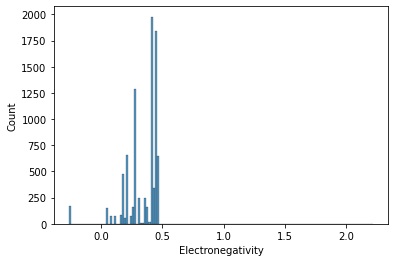

In [21]:
# Гистограмма значений электроотрицательности
sns.histplot(np.log10(df['Electronegativity']))

In [24]:
df['Electronegativity'].describe()

count    9143.000000
mean        2.198733
std         1.848742
min        -1.200000
25%         1.830000
50%         2.540000
75%         2.796000
max       165.000000
Name: Electronegativity, dtype: float64

In [25]:
delete_where(df, np.log10(df['Electronegativity']) >= 0.5)

d:\python\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\python\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Diameter (nm)', ylabel='Count'>

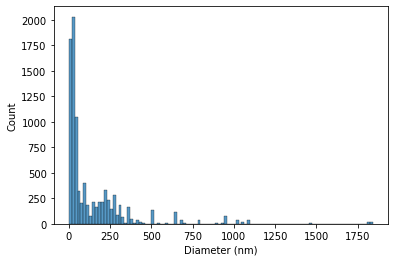

In [26]:
# Гистограмма значений диаметра
sns.histplot(data=df, x='Diameter (nm)')

In [27]:
# Удаление выбросов
delete_where(df, df['Diameter (nm)'] > 1125)

<AxesSubplot:xlabel='Molecular weight (g/mol)', ylabel='Count'>

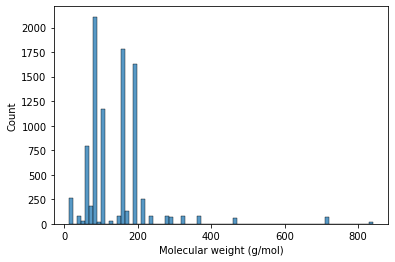

In [28]:
# Гистограмма значений молекулярной массы
sns.histplot(data=df, x='Molecular weight (g/mol)')

In [31]:
delete_where(df, df['Molecular weight (g/mol)'] > 400)

<AxesSubplot:xlabel='Zeta_in_Water (mV)', ylabel='Count'>

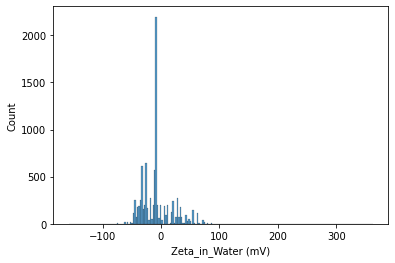

In [32]:
# Гистограмма значений Зета-Потенциала (в воде)
sns.histplot(data=df, x='Zeta_in_Water (mV)')

In [33]:
# Ограничения заряда
df['Zeta_in_Water (mV)'] = df['Zeta_in_Water (mV)'].apply(lambda x: clamp(x, -100, 100))

In [34]:
# Логарифмирование концентрации
df['Concentration (ug/mL)'] = np.log10(df['Concentration (ug/mL)'])
df['Concentration (ug/mL)'].isna().sum()

d:\python\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0

<AxesSubplot:xlabel='Concentration (ug/mL)', ylabel='Count'>

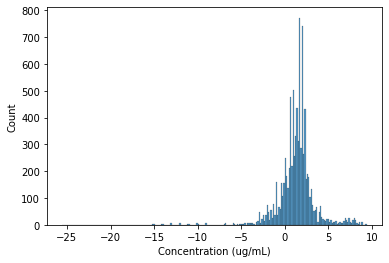

In [35]:
sns.histplot(df['Concentration (ug/mL)'])

In [36]:
# Удаление выбросов
delete_where(df, df['Concentration (ug/mL)'] < -4.5)

In [37]:
# Ограничение концентрации
df['Concentration (ug/mL)'] = df['Concentration (ug/mL)'].apply(lambda x: clamp(x, -5, 10**5))

In [38]:
# Получение описания формы НЧ
get_bounds(df, 'Diameter (nm)')

<AxesSubplot:xlabel='Density (g/cm3)', ylabel='Count'>

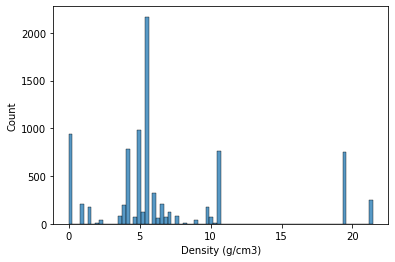

In [39]:
# Гистограмма значений плотности
# Тут всё нормально
sns.histplot(data=df, x='Density (g/cm3)')

<AxesSubplot:xlabel='is_inorganic', ylabel='count'>

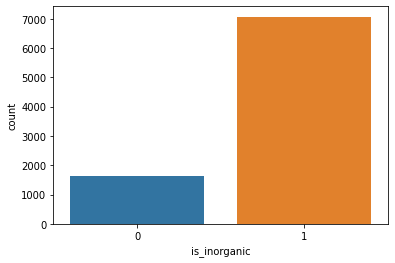

In [40]:
# Соотношение представленных неорг. и орг. веществ
sns.countplot(data=df, x='is_inorganic')

<AxesSubplot:xlabel='is_inorganic', ylabel='Viability (%)'>

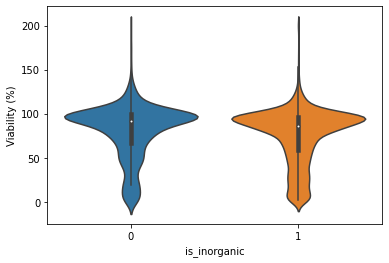

In [41]:
# Как органичность вещества влияет на жизнеспособность клетки
sns.violinplot(data=df, x='is_inorganic', y='Viability (%)')

In [42]:
# Практически не влияет

<AxesSubplot:xlabel='Cell_Age', ylabel='count'>

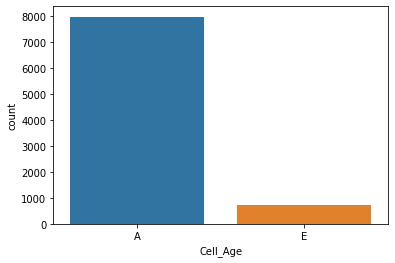

In [43]:
# Возраст клетки
sns.countplot(data=df, x='Cell_Age')

<AxesSubplot:xlabel='Cell_Age', ylabel='Viability (%)'>

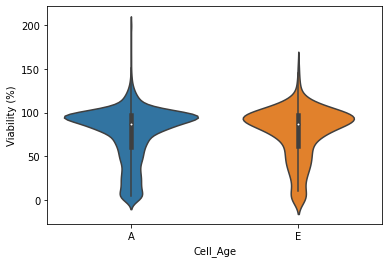

In [44]:
# Как возраст клетки влияет на её жизнеспособность
sns.violinplot(data=df, x='Cell_Age', y='Viability (%)')

In [45]:
# Практически не влияет

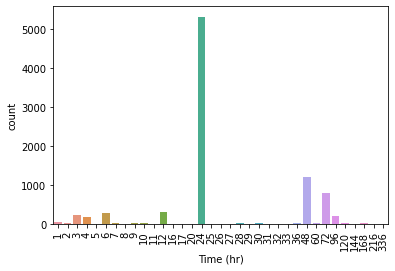

In [46]:
# Соотношение количеств каждого из
# представленных в датасете 
# продолжительностей проведения опыта
sns.countplot(data=df, x='Time (hr)')
_ = plt.xticks(rotation=90)

In [47]:
# 24, 48, 72, 96 часов -- довольно распространённые
# продолжительности проведения опыта, т.к. они делятся на 24;
# Т.е 24 -- 1 сутки, 45 -- 2 суток, 72 -- 3 суток и т.д...

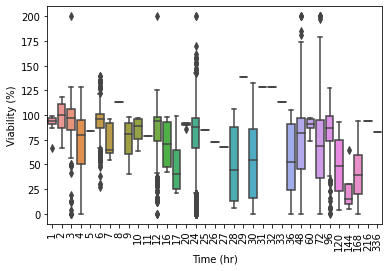

In [48]:
# Как продолжительность опыта влияет на жизнеспособность клетки?
sns.boxplot(data=df, x='Time (hr)', y='Viability (%)')
_ = plt.xticks(rotation=90)

In [49]:
# Чем больше продолжительность, тем меньше
# у клетки жизнеспособность. После 1 часа
# опыта НЧ не успевает негативно повлиять на клетки.

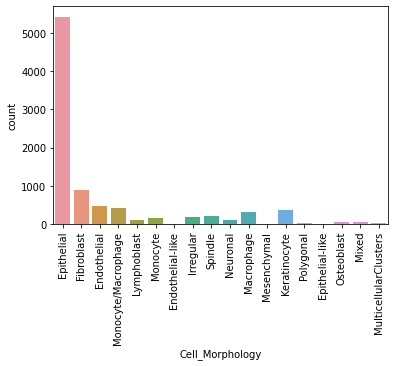

In [50]:
# Тип ткани клетки
sns.countplot(data=df, x='Cell_Morphology')
_ = plt.xticks(rotation=90)

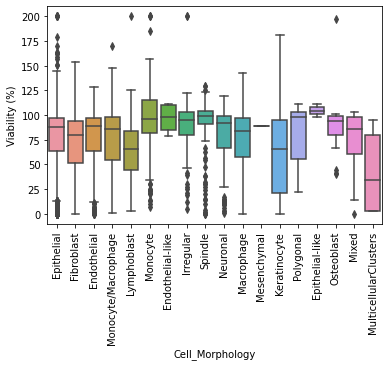

In [51]:
# Как тип ткани клетки влияет на её жизнеспособность
sns.boxplot(data=df, x='Cell_Morphology', y='Viability (%)')
_ = plt.xticks(rotation=90)

In [52]:
# Можно судить о сильном негативном влиянии тканей типа
# "Kerationocyte", "MulticellularClusters", "Lymphoblast"
# на жизнеспособность клетки

<AxesSubplot:xlabel='Cell_Source', ylabel='count'>

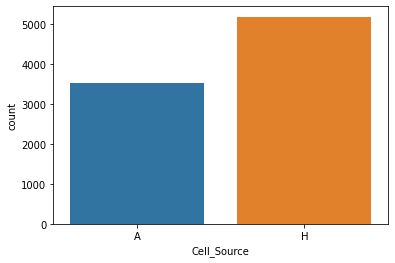

In [53]:
# Источник клетки (Животное/Человек)
sns.countplot(data=df, x='Cell_Source')

<AxesSubplot:xlabel='Cell_Source', ylabel='Viability (%)'>

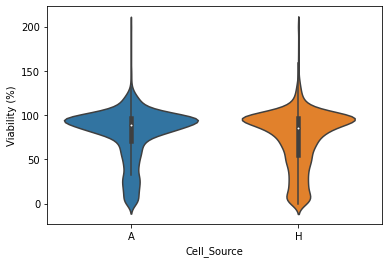

In [54]:
# Как источник клетки влияет на её
# жизнеспособность
sns.violinplot(data=df, x='Cell_Source', y='Viability (%)')

In [55]:
# Практически никак.

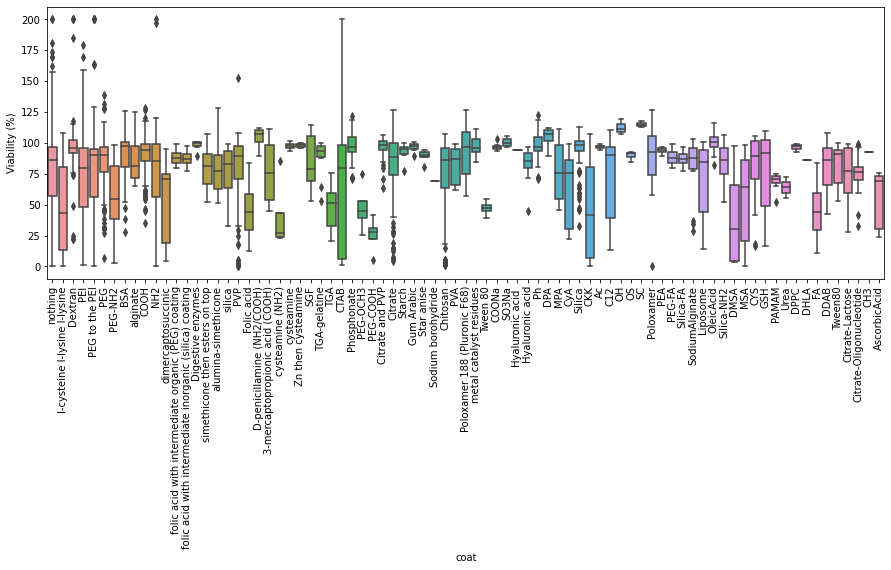

In [56]:
# Как поверхн. модификации НЧ влияют на
# жизнеспособность клетки
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='coat', y='Viability (%)')
_ = plt.xticks(rotation=90)

In [57]:
# Сильно отрицательно влияют оболочки:
# I-cysteine-I-lysine-I-lysine
# CTAB
# CKK
# DMSA
# MSA
# Folic acid
# dimercaptosuccinic

<AxesSubplot:xlabel='Zeta_in_Medium (mV)', ylabel='Count'>

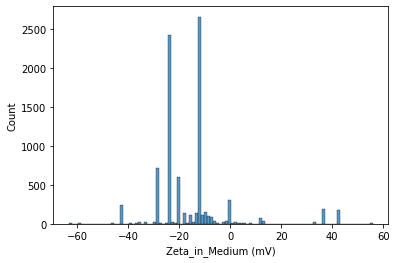

In [58]:
# Дзета-потенциал НЧ в среде
sns.histplot(data=df, x='Zeta_in_Medium (mV)')

<AxesSubplot:xlabel='Cell line (L)/primary cells (P)', ylabel='count'>

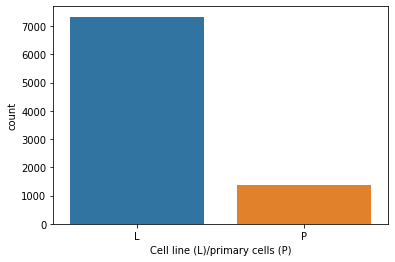

In [59]:
# Тип клеток (клеточная линия или отобрано непосредственно из организма)
sns.countplot(data=df, x='Cell line (L)/primary cells (P)')

<AxesSubplot:xlabel='Cell line (L)/primary cells (P)', ylabel='Viability (%)'>

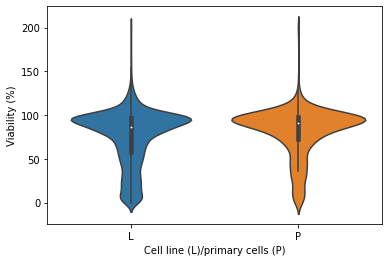

In [60]:
# Как тип клеток влияет на их жизнеспособность
sns.violinplot(data=df, x='Cell line (L)/primary cells (P)', y='Viability (%)')

In [61]:
# Почти никак

<AxesSubplot:xlabel='Size_in_Water (nm)', ylabel='Count'>

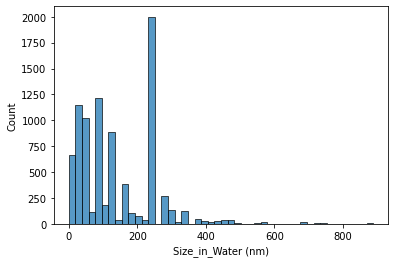

In [62]:
# Гистограмма размера НЧ в воде
sns.histplot(data=df, x='Size_in_Water (nm)')

In [63]:
# Удаление выбросов
delete_where(df, df['Size_in_Water (nm)'] > 600)

In [64]:
# Описывающие форму НЧ столбцы
bounds = ['Surface area (um2)', 'Volume (um3)', 'U_Surface area (um-1)']

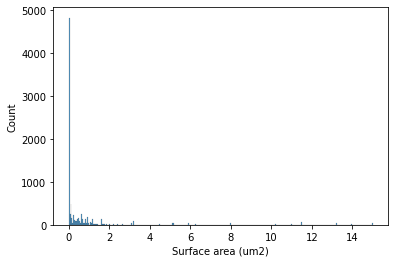

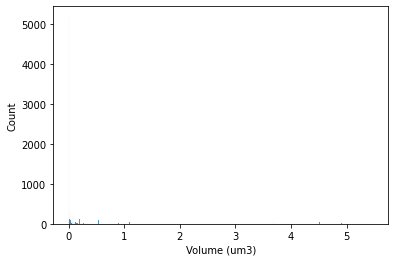

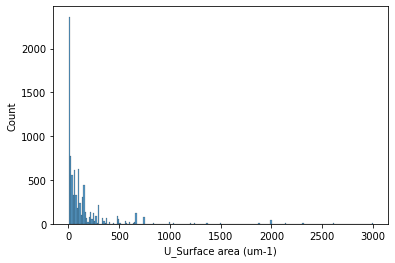

In [65]:
# Их иллюстрация
for bound in bounds:
    sns.histplot(data=df, x=bound)
    plt.show()

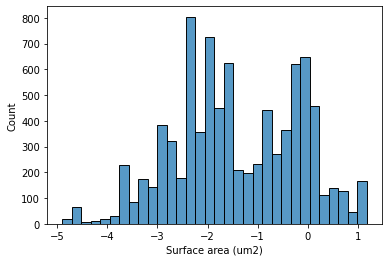

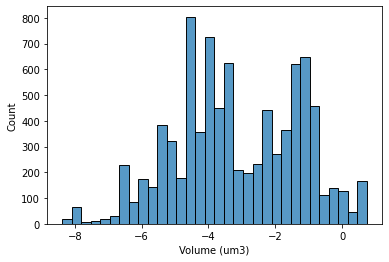

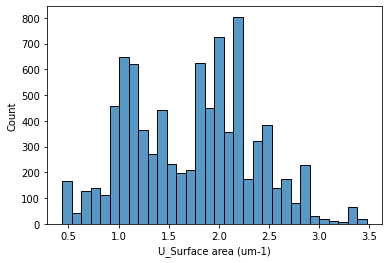

In [66]:
# Их логарифмирование и иллюстрация
for bound in bounds:
    df[bound] = np.log10(df[bound])
    sns.histplot(data=df, x=bound)
    plt.show()

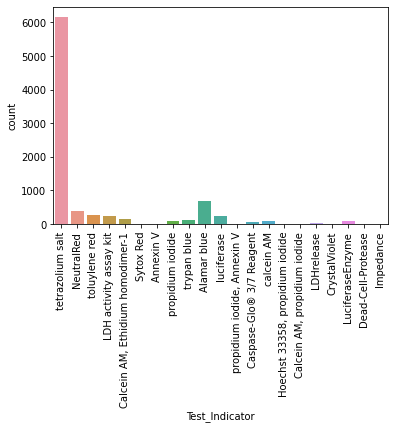

In [67]:
# Использованный реагент
sns.countplot(data=df, x='Test_Indicator')
_ = plt.xticks(rotation=90)

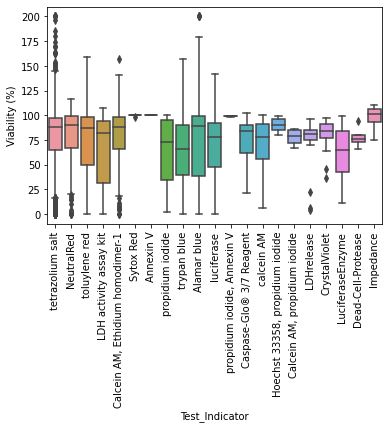

In [68]:
# Как использованный реагент влияет на жизнеспособность клетки
sns.boxplot(data=df, x='Test_Indicator', y='Viability (%)')
_ = plt.xticks(rotation=90)

In [69]:
# Впринципе, почти не влияет; можно подчеркнуть,
# что при использовании "LDH activity assay kit"
# чаще получают результаты ниже среднего

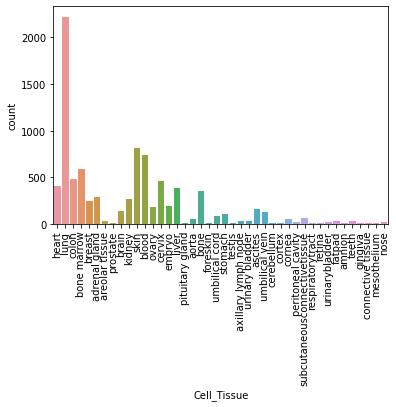

In [70]:
# Орган, из которого взяли клетку
sns.countplot(data=df, x='Cell_Tissue')
_ = plt.xticks(rotation=90)

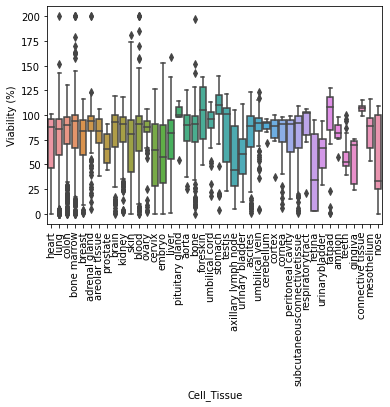

In [71]:
# Как родной орган клетки влияет на её жизнеспособность
sns.boxplot(data=df, x='Cell_Tissue', y='Viability (%)')
_ = plt.xticks(rotation=90)

In [72]:
# Впринципе, не сильно влияет, но,
# например, у клеток сетчатки (глаза),
# носа, подмышечного лимфатического узла,
# у шейки матки и эмбриона в среднем
# жизнеспособность ниже.

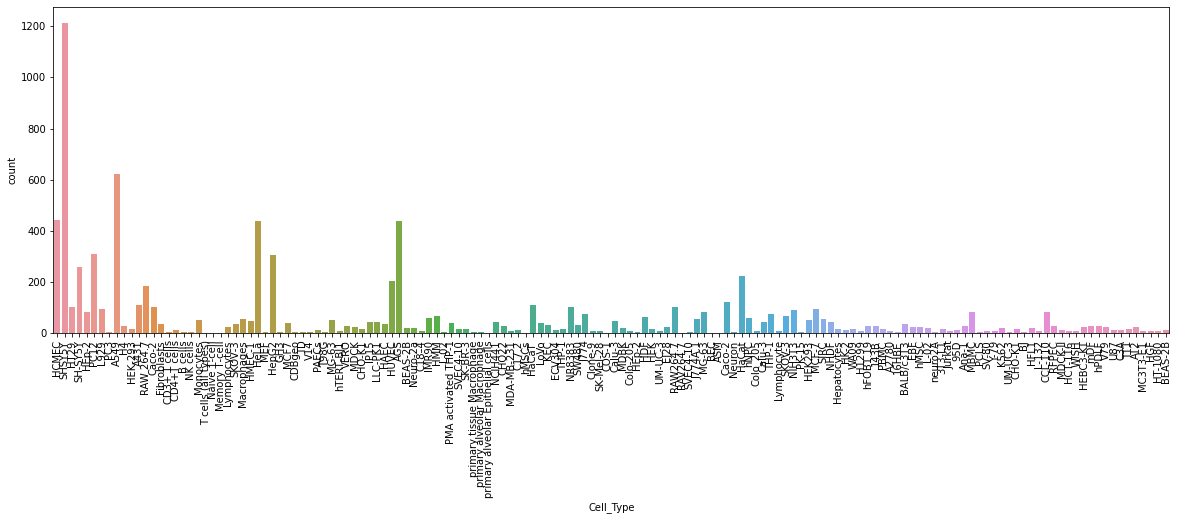

In [73]:
# Тип клеток
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Cell_Type')
_ = plt.xticks(rotation=90)

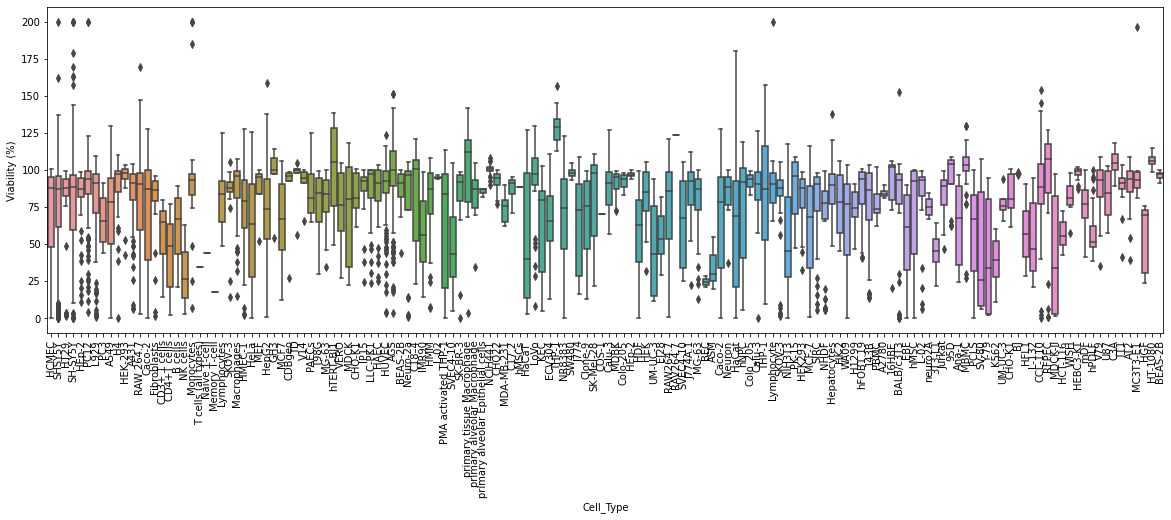

In [74]:
# Как этот показатель влияет на жизнеспособность клеток
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='Cell_Type', y='Viability (%)')
_ = plt.xticks(rotation=90)

In [75]:
# Можно отметить, что у типов "NK cells",
# "HaCal", "MDCK-II", "Y-79", "SV-80"
# показатели довольно низкие

<AxesSubplot:>

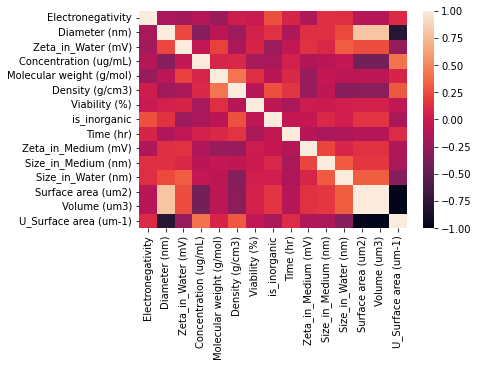

In [76]:
# Корреляционная матрица
sns.heatmap(df.corr())

In [77]:
# Удаление объёма и удельной площади
df.drop(['Volume (um3)', 'U_Surface area (um-1)'], axis=1, inplace=True)

In [78]:
# Кодирование
encoded, encoders = encode(df.drop('Nanoparticle', axis=1))

d:\python\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<BarContainer object of 21 artists>

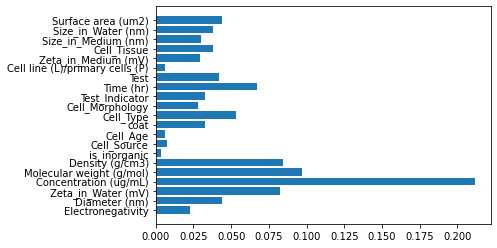

In [79]:
# Оценка значимости параметров с помощью
# двух моделей
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

x, y = encoded.drop('Viability (%)', axis=1), encoded['Viability (%)']

rfr = RandomForestRegressor().fit(x, y)
plt.barh(x.columns, rfr.feature_importances_)

d:\python\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


<BarContainer object of 21 artists>

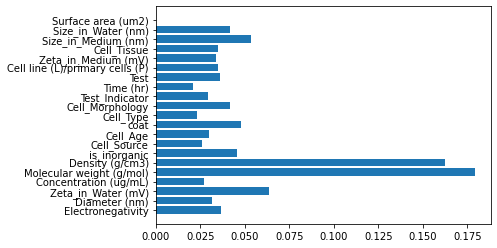

In [80]:
xgbr = XGBRegressor().fit(x, y)
plt.barh(x.columns, xgbr.feature_importances_)

In [81]:
# Можно выбросить только это
encoded.drop('Cell_Source', axis=1, inplace=True)

In [92]:
encoded['Nanoparticle'] = df['Nanoparticle']

In [93]:
encoded.to_excel('encoded.xlsx', index=False)

In [94]:
# Сохраняем энкодеры
import pickle

with open('encoders.bf', 'wb') as f:
    del encoders['Cell_Source']
    pickle.dump(encoders, f)